In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import inverse_kinematics_objective, draw_solutions
from idea import IDEA

In [10]:
rectangles = [((0.4, 2.), (5., 4.)), ((-5., 2.), (-0.8, 4.)), ((-0.5, 2.), (0.1, 4.)),
              ((-5., 5.), (-0.4, 6.)), ((-0.2, 5.), (5., 6.))]
target_x = 1.
target_y = 8.
S = [0.7] * 10 + [0.3] * 10
d = len(S)
x_min = -np.pi
x_max = np.pi

objective = inverse_kinematics_objective(S, (target_x, target_y), rectangles)
n_constraints = len(rectangles)

n = 600
n_inf = int(0.7*n)
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.05
num_iterations = 300

populations, scores = IDEA(objective, n_constraints, x_min, x_max, d, n, n_inf, eta_c, eta_m, p_c, p_m, num_iterations, log_interval=20)

/home/i291318/Dynamic-inverse-kinematics/simulation.py:23: RuntimeWarning: divide by zero encountered in true_divide
  t = vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:24: RuntimeWarning: divide by zero encountered in true_divide
  u = vector_product(x2 - x1, d1) / rs


Iteration 0, #feasible: 321, best: [29.41852532], #infeasible: 279, best: [16.19298453  1.        ]
Iteration 20, #feasible: 180, best: [26.99921791], #infeasible: 420, best: [1.46419069 1.        ]
Iteration 40, #feasible: 180, best: [14.62019748], #infeasible: 420, best: [0.14863578 1.        ]
Iteration 60, #feasible: 180, best: [12.73102337], #infeasible: 420, best: [0.00671203 1.        ]
Iteration 80, #feasible: 180, best: [10.99634903], #infeasible: 420, best: [0.00527898 1.        ]
Iteration 100, #feasible: 180, best: [9.81066704], #infeasible: 420, best: [3.46827362e-05 1.00000000e+00]
Iteration 120, #feasible: 180, best: [0.16933485], #infeasible: 420, best: [2.91850337e-07 1.00000000e+00]
Iteration 140, #feasible: 180, best: [0.01953422], #infeasible: 420, best: [1.04054604e-08 1.00000000e+00]
Iteration 160, #feasible: 180, best: [0.00351607], #infeasible: 420, best: [5.00279971e-10 1.00000000e+00]
Iteration 180, #feasible: 180, best: [0.00129567], #infeasible: 420, best: [

In [11]:
scores[-1, scores[-1, :, 1] == 0., 0].min()

1.156515994405394e-06

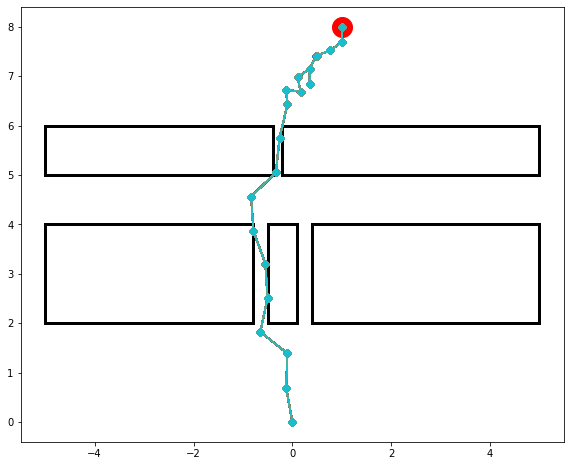

In [12]:
mask = scores[-1, :, 1] == 0.
feasible_population = populations[-1][mask, :]
draw_solutions(feasible_population, S, target_x, target_y, rectangles, figsize=(10, 8))

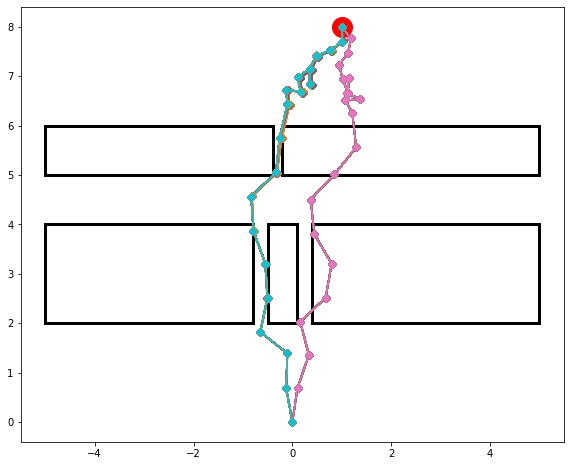

In [13]:
infeasible_population = populations[-1][~mask, :]
draw_solutions(infeasible_population, S, target_x, target_y, rectangles, figsize=(10, 8))